# Funciones de Distribucion de probabilidades
## Distribucion Uniforme

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = 1
b = 100
n= 200

data = np.random.uniform(a,b,n)
data

array([32.45708957, 18.57620168, 16.29758398, 36.32629542, 77.36729736,
       71.83347703,  7.62293252, 71.2485164 , 94.28460199, 83.09316013,
       46.42499551, 58.91441731, 31.49543057, 22.97590124,  3.25981945,
       18.64048067, 63.35168791, 84.84950107,  4.00232748, 97.22862604,
       45.70103679, 78.32984204, 22.33757229, 69.24519529, 12.01968872,
       26.12990064, 32.99113429, 18.99927025, 41.12077543, 79.9541351 ,
        3.00770857, 36.21875003, 23.93513697, 18.48310184, 63.3584041 ,
       61.28173036, 19.94807194, 53.65243643, 71.56115076, 34.7148355 ,
       11.35294884, 46.8370401 , 27.41850797, 69.3268607 , 76.11873301,
       55.74164927, 70.36003876, 73.34883881, 66.93494631, 80.10570993,
       13.48574868, 87.72648585,  4.35848999, 60.63289118, 57.25431935,
       71.39795065, 53.70964005, 53.13819666, 79.9528796 ,  1.48138399,
       61.66801587, 75.70344772,  7.42464312, 28.93761141, 95.34619728,
       10.73226962, 39.24749894, 47.54727584, 91.4775149 , 29.82

(array([21., 19., 22., 20., 19., 21., 18., 23., 22., 15.]),
 array([ 1.48138399, 11.25126784, 21.02115168, 30.79103552, 40.56091937,
        50.33080321, 60.10068705, 69.8705709 , 79.64045474, 89.41033858,
        99.18022243]),
 <BarContainer object of 10 artists>)

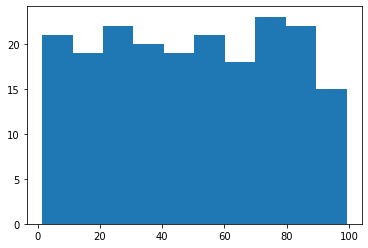

In [4]:
plt.hist(data)

In [5]:
a = 1
b = 100
n= 1000000 # voy cambiando a mas datos

data2 = np.random.uniform(a,b,n)

(array([ 99755.,  99506., 100208.,  99653., 100661., 100351.,  99964.,
         99694., 100274.,  99934.]),
 array([ 1.00025706, 10.90023046, 20.80020386, 30.70017727, 40.60015067,
        50.50012407, 60.40009748, 70.30007088, 80.20004428, 90.10001769,
        99.99999109]),
 <BarContainer object of 10 artists>)

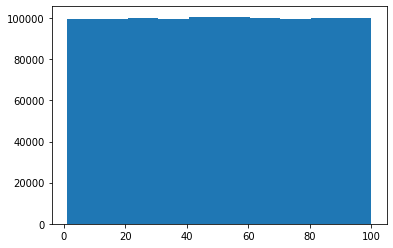

In [6]:
plt.hist(data2) #Va tomando mas forma

## Distribucion Normal

In [7]:
data = np.random.randn(1000000)

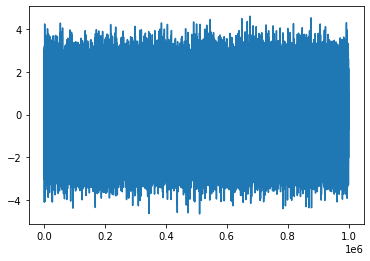

In [8]:
x = range(1,1000001)
plt.plot(x, data)

(array([9.10000e+01, 2.33600e+03, 2.73220e+04, 1.40481e+05, 3.20250e+05,
        3.26697e+05, 1.49533e+05, 3.04900e+04, 2.68900e+03, 1.11000e+02]),
 array([-4.66915965, -3.74005255, -2.81094545, -1.88183834, -0.95273124,
        -0.02362413,  0.90548297,  1.83459008,  2.76369718,  3.69280429,
         4.62191139]),
 <BarContainer object of 10 artists>)

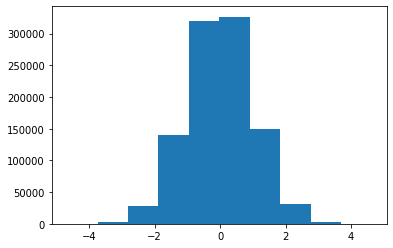

In [9]:
plt.hist(data)

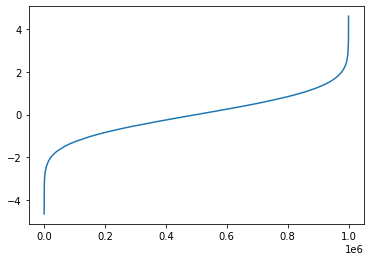

In [10]:
plt.plot(x,sorted(data)) # Funcion de distribucion acumulada

### Si quiero mi propia media

In [11]:
mu = 5.5 # media
sd = 2.5 #desviacion
data = mu + sd * np.random.randn(10000) # Z = (x - mu ) / sd Teorema central del limite, se hace una desviacion estandar N(Ç0,1), X = mu + sd * Z

(array([   5.,   67.,  479., 1613., 2978., 2835., 1519.,  439.,   61.,
           4.]),
 array([-4.62720675, -2.59632035, -0.56543395,  1.46545245,  3.49633885,
         5.52722525,  7.55811165,  9.58899805, 11.61988446, 13.65077086,
        15.68165726]),
 <BarContainer object of 10 artists>)

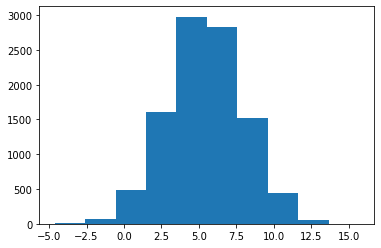

In [12]:
plt.hist(data)

In [13]:
data2 = np.random.randn(2,4) # esto genera 2 arrays de 4 elementos
data2

array([[ 0.91431367, -0.08742819,  1.19727179, -0.30714057],
       [-1.46694951, -2.08339845, -0.48593745,  1.49162242]])

# La Simulación de Montecarlo

Básicamente tenemos un ciruclo de radio R incluido dentro de un cuadrado de lado 2R
La simulacion consiste en determinar cual es la probabilidad de que si yo elijo un punto al azar dentro del cuadrado este me caiga a su vez dentro del circulo
Para ello si sabemos que la probabilidad es: 

P(caer dentro del círculo) / P(caer dentro del cuadrado)

area circulo / area cuadrado

Pi x R x R / 2 x R x 2 x R

Pi / 4 es el resultado

#### Generamos 2 numeros aleatorios entre 0 y 1

* Calcularemos x * x + y * y (ecuacion del circulo)
    * si el valor es inferior a 1, estamos dentro del circulo
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo
* Usamos dicha pprobabilidad ppara aproximar  el valorr  de pi
* Repetimos el experimeentto un numero suficiente de veces (ej 1000) para obtenerr 1000 aproximaciones de pi
* Calcullamos el promedio de los 1000 experimentos anterioires para dar unn valoror fiinal de pi

In [27]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    n = 1000
    n_exp = 100
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = x[j] * x[j] + y[i] * y[i]
            if z <=1:
                value +=1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
        
    pi = pi_avg / n_exp

    print(pi)
    plt.plot(pi_value_list)
    

3.12136


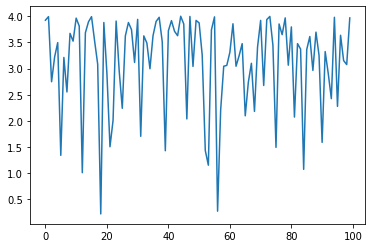

In [45]:
pi_montecarlo(10000,2000)

# Dummy Data Set
* Es una lista o array de numeros aleatorios generados a trave de varios metodos, cada uno de dichos metodos obtiene un vector columna que pasará a ser la columna del dataframe
* las columnas se pasan como diccionarios donde el key es la columna y el value es la coleccion de datos generada

In [46]:
import pandas as pd

In [73]:
n = 1000000
data = pd.DataFrame (
    {
    'A' : np.random.randn(n),
    'B' : 1.5 + 2.5 * np.random.randn(n),
    'C' : np.random.uniform(5, 32, n)
    }


)

In [74]:
data.head()

,A,B,C
0,-0.590171,6.285215,8.824198
1,-0.316499,-2.133042,19.498026
2,-0.150101,-0.113490,11.444669
3,-0.151112,3.210513,30.359365
4,-0.034463,5.257094,20.277769


In [75]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.002229,1.499166,18.494076
std,1.000195,2.500867,7.791361
min,-4.653092,-11.154955,5.000042
25%,-0.677203,-0.186767,11.744724
50%,-0.002493,1.497881,18.493443
75%,0.671772,3.187187,25.238831
max,5.493166,14.155317,31.999973


### Podemos observar que:
* En A la media es 0 casi, y la desviacion standar 1 (por ser una distribucion normal entre 1 y 0)
* en B la media es 1.5 casi, y la desviacion standard es 2.5, la cual fijamos nosotros
* En C la media es el punto intermedio entre 5 y 32 5 + [(32-5)/2] = 18.5 y la desviacion tiene un calculo (VER formula online) pero cumple con la teoria

(array([ 99865., 100316., 100126.,  99659., 100297.,  99928., 100257.,
         99882., 100169.,  99501.]),
 array([ 5.00004171,  7.7000348 , 10.40002789, 13.10002098, 15.80001407,
        18.50000716, 21.20000025, 23.89999334, 26.59998643, 29.29997952,
        31.99997261]),
 <BarContainer object of 10 artists>)

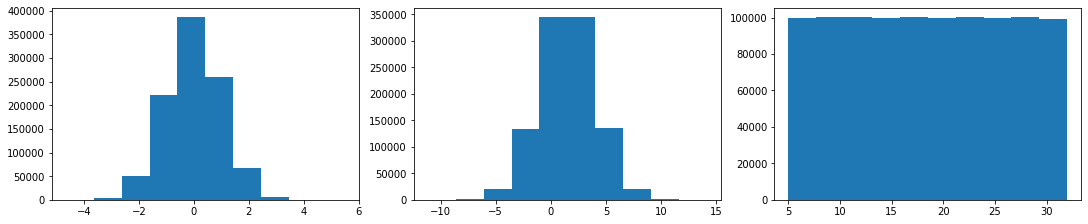

In [97]:

fig1, f1_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(15,3))

f1_axes[0].hist(data["A"])
f1_axes[1].hist(data["B"])
f1_axes[2].hist(data["C"])




In [101]:
datachurn = pd.read_csv("../datasets/Customer Churn Model.txt")
datachurn.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [105]:
column_names = datachurn.columns.values.tolist()
column_names


['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [108]:
a = len(column_names)
a

21

In [116]:
data_dummy_string = pd.DataFrame(
    {
        
    'A' : np.random.randn(a),
    'B' : 1.5 + 2.5 * np.random.randn(a),
    'Column Names' : column_names

    }, index = range(42, 42 + a) # NO OLVIDARSE LAS COMITAS CULIADITAS
    # ESTO LO HACEMOS por si queremos empalmar un dummy data set a continuacion de otro, para que no empiece de 1 el index





)

In [114]:
data_dummy_string.head(n)

,A,B,Column Names
0,0.371225,1.113604,State
1,-0.140303,-0.416326,Account Length
2,0.117303,-0.447760,Area Code
3,0.430353,4.062932,Phone
4,-1.980016,-2.083637,Int'l Plan
5,-0.985262,0.162681,VMail Plan
6,-0.669286,1.856466,VMail Message
7,-1.046514,1.539600,Day Mins
8,-0.558146,-0.777790,Day Calls
9,1.521801,2.553179,Day Charge
